# Pre-class work
## Moore's law
#### Importing CPU benchmark data

In [2]:
import csv
import datetime as dt

BNCHMRK = "126.gcc"

cpu_date = []
base_res = []

def format_dt(cpu_name):
    new_name = cpu_name[cpu_name.find('-') + 1:]
    if new_name.find('-') == 6:
        if '5' < new_name[0] <= '9':
            new_name = '19' + new_name
        else:
            new_name = '20' + new_name

    new_name = new_name[:new_name.find('-')]
    
    return dt.datetime.strptime(new_name, "%Y%m%d")

with open('specs/benchmarks.txt') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for row in csv_reader:
        if row[1] == BNCHMRK:
            if row[0][0] != 'p':
                cpu_date.append(format_dt(row[0]))
                base_res.append(float(row[2]))
                
print(len(cpu_date))

494


#### Plotting CPU benchmark data

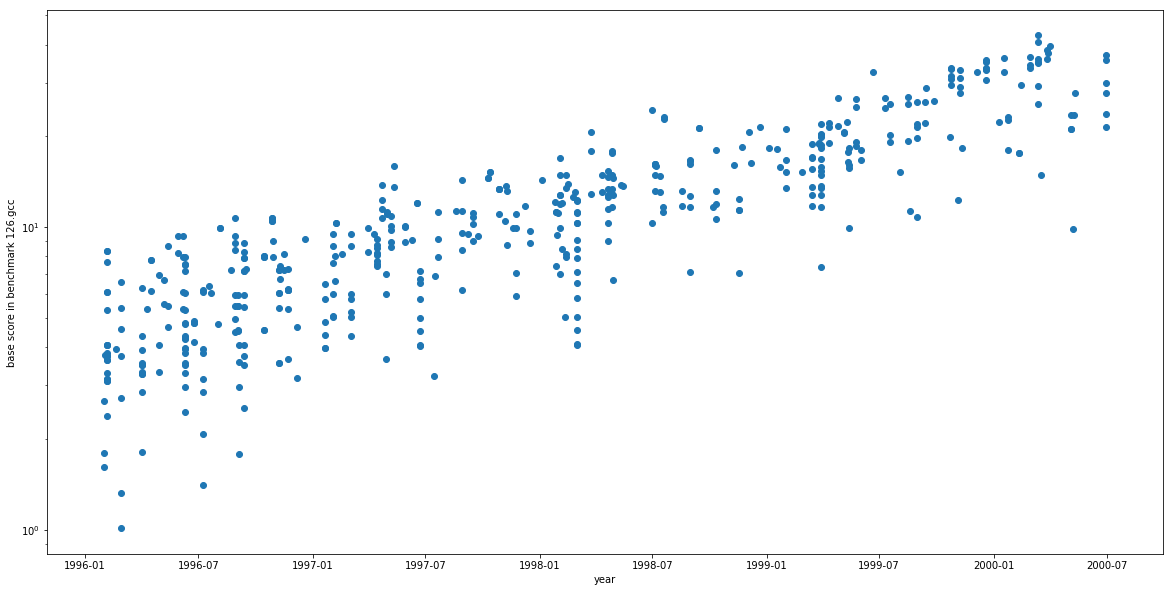

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(cpu_date, base_res)
plt.xlabel('year')
plt.ylabel('base score in benchmark 126.gcc')
plt.yscale('log')
plt.show()

#### Training a linear regression

In [6]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

cpu_date_col = list(map(lambda x: [int(round(x.timestamp()))], cpu_date))

cpu_date_train = cpu_date_col[:-84]
cpu_date_test = cpu_date_col[-84:]

base_res_train = base_res[:-84]
base_res_test = base_res[-84:]

regr = linear_model.LinearRegression()
regr.fit(cpu_date_train, base_res_train)

base_res_pred_test = regr.predict(cpu_date_test)
print(regr.coef_, regr.intercept_)

[1.85803525e-07] -151.20242256079297


#### Plotting regression line

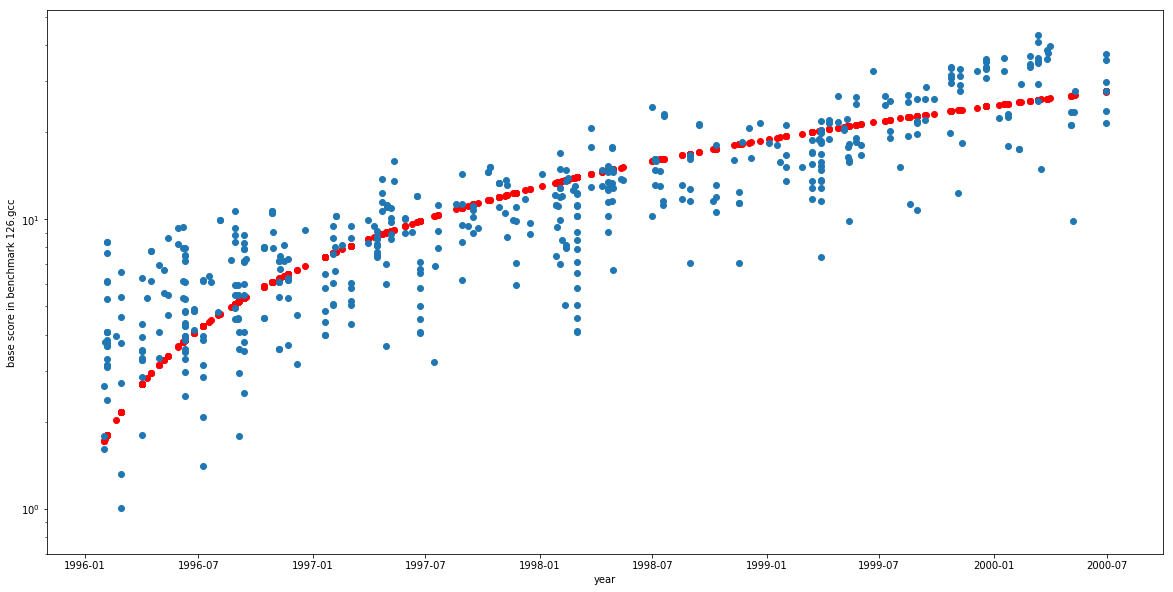

In [219]:
base_res_pred = regr.predict(cpu_date_col)

plt.figure(figsize=(20,10))
plt.scatter(cpu_date, base_res_pred, color="red")
plt.scatter(cpu_date, base_res)
plt.xlabel('year')
plt.ylabel('base score in benchmark 126.gcc')
plt.yscale('log')
plt.show()

In [220]:
print("Mean squared error: %.2f" % mean_squared_error(base_res_test, base_res_pred_test), "pts²")
print('Variance score: %.2f' % r2_score(base_res_test, base_res_pred_test))

Mean squared error: 14.93 pts²
Variance score: 0.67


## MNIST Digits

#### Importing MNIST images

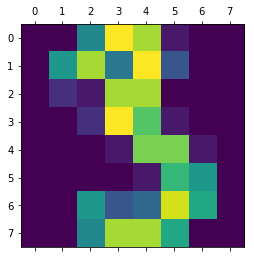

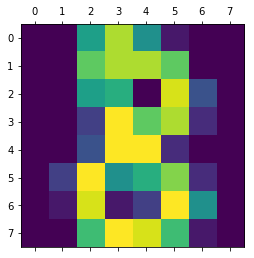

In [221]:
from sklearn.datasets import load_digits

digits = load_digits()
data = []
trgt = []

for i in range(len(digits.target)): # slice it bruh
    if digits.target[i] == 3 or digits.target[i] == 8:
        data.append(digits.data[i])
        trgt.append(digits.target[i])

plt.matshow(digits.images[3]) 
plt.matshow(digits.images[8])
plt.show()

#### Training kNN

In [230]:
from sklearn import neighbors

k = 3

data_train = data[:-72]
data_test = data[-72:]

trgt_train = trgt[:-72]
trgt_test = trgt[-72:]

clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(data_train, trgt_train)

trgt_pred = clf.predict(data_test)

In [231]:
print("Error rate is:", 1 - sum(trgt_pred == trgt_test) / len(trgt_test))
clf.score(X_test, y_test)

Error rate is: 0.02777777777777779
